In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.layers import *
import os
from tqdm import tqdm
from tensorflow.keras.utils import load_img

In [2]:
dataset_path = 'UTK-FaceDataset/UTKFace'

In [3]:
dataset_path[0]

'U'

In [4]:
image_path = []
age = []
gender = []

for file in tqdm(os.listdir(dataset_path)):
    image_address = os.path.join(dataset_path,file)
    temp = file.split("_")
    age_temp = temp[0]
    gender_temp =temp[1]
    # append information to lists
    image_path.append(image_address)
    age.append(age_temp)
    gender.append(gender_temp)
    

100%|██████████| 23708/23708 [00:00<00:00, 364968.40it/s]


In [5]:
data = pd.DataFrame({
    'Image':image_path,
    'Age':age,
    'Gender':gender
})

In [6]:
data.head()

,Image,Age,Gender
0,UTK-FaceDataset/UTKFace\100_0_0_20170112213500...,100,0
1,UTK-FaceDataset/UTKFace\100_0_0_20170112215240...,100,0
2,UTK-FaceDataset/UTKFace\100_1_0_20170110183726...,100,1
3,UTK-FaceDataset/UTKFace\100_1_0_20170112213001...,100,1
4,UTK-FaceDataset/UTKFace\100_1_0_20170112213303...,100,1


In [7]:
data['Age'] = data['Age'].astype(int)
data['Gender'] = data['Gender'].astype(int)

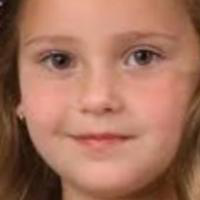

In [8]:
load_img(data['Image'][110])

In [9]:
from PIL import Image

In [10]:
def Image_to_array(featureColumn):
    features = []
    for images in tqdm(featureColumn):
        image = load_img(images,color_mode='grayscale')
        image_resized = image.resize((128,128),Image.LANCZOS)
        image_resized = np.array(image_resized)
        features.append(image_resized)

    features = np.array(features)
    features = features.reshape(len(features),128,128,1)
    return features
        
    

In [11]:
X = Image_to_array(data['Image'])

100%|██████████| 23708/23708 [00:37<00:00, 634.27it/s]


In [12]:
X.shape

(23708, 128, 128, 1)

In [13]:
X = X/255.0

In [14]:
y_gender = np.array(data['Gender'])
y_age = np.array(data['Age'])

In [15]:
y_gender.shape , y_age.shape

((23708,), (23708,))

### CNN  ------ Functional Model

In [16]:
input_shape = (128,128,1)

In [17]:
inputs = Input((input_shape))

In [18]:
from tensorflow.keras import Model

In [19]:
conv1 = Conv2D(32,kernel_size = (3,3),activation=None)(inputs)
x = BatchNormalization()(conv1)
x = ReLU()(x)
maxp1 = MaxPooling2D(pool_size=(2,2))(x)


conv2 = Conv2D(64,kernel_size = (3,3),activation=None)(maxp1)
x = BatchNormalization()(conv2)
x = ReLU()(x)
maxp2 = MaxPooling2D(pool_size=(2,2))(x)


conv3 = Conv2D(128,kernel_size = (3,3),activation=None)(maxp2)
x = BatchNormalization()(conv3)
x = ReLU()(x)
maxp3 = MaxPooling2D(pool_size=(2,2))(x)


conv4 = Conv2D(256,kernel_size = (3,3),activation=None)(maxp3)
x = BatchNormalization()(conv4)
x = ReLU()(x)
maxp4 = MaxPooling2D(pool_size=(2,2))(x)

flatten = Flatten()(maxp4)

dense_1 = Dense(256,activation = 'relu')(flatten)
dense_2 = Dense(256,activation = 'relu')(flatten)

dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_2)


output_1 = Dense(1,activation = 'sigmoid', name = "Gender_Output")(dropout_1)
output_2 = Dense(1,activation = 'relu' ,name = "Age_Output")(dropout_2)


model = Model(inputs = [inputs],outputs=[output_1,output_2])

In [20]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 126, 126,  │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 126, 126,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 126, 126,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 63, 63,    │          0 │ re_lu[0][0]       │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 61, 61,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 30, 30,    │          0 │ re_lu_1[0][0]     │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ re_lu_2[0][0]     │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 12, 12,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12, 12,    │      1,024 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 12, 12,    │          0 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 6, 6, 256) │          0 │ re_lu_3[0][0]   

 Total params: 5,109,378 (19.49 MB)

 Trainable params: 5,108,418 (19.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [21]:
model.compile(loss=['binary_crossentropy','mae'], optimizer='Adam',metrics = ['accuracy','mae'])

In [22]:
from tensorflow.keras.utils import plot_model

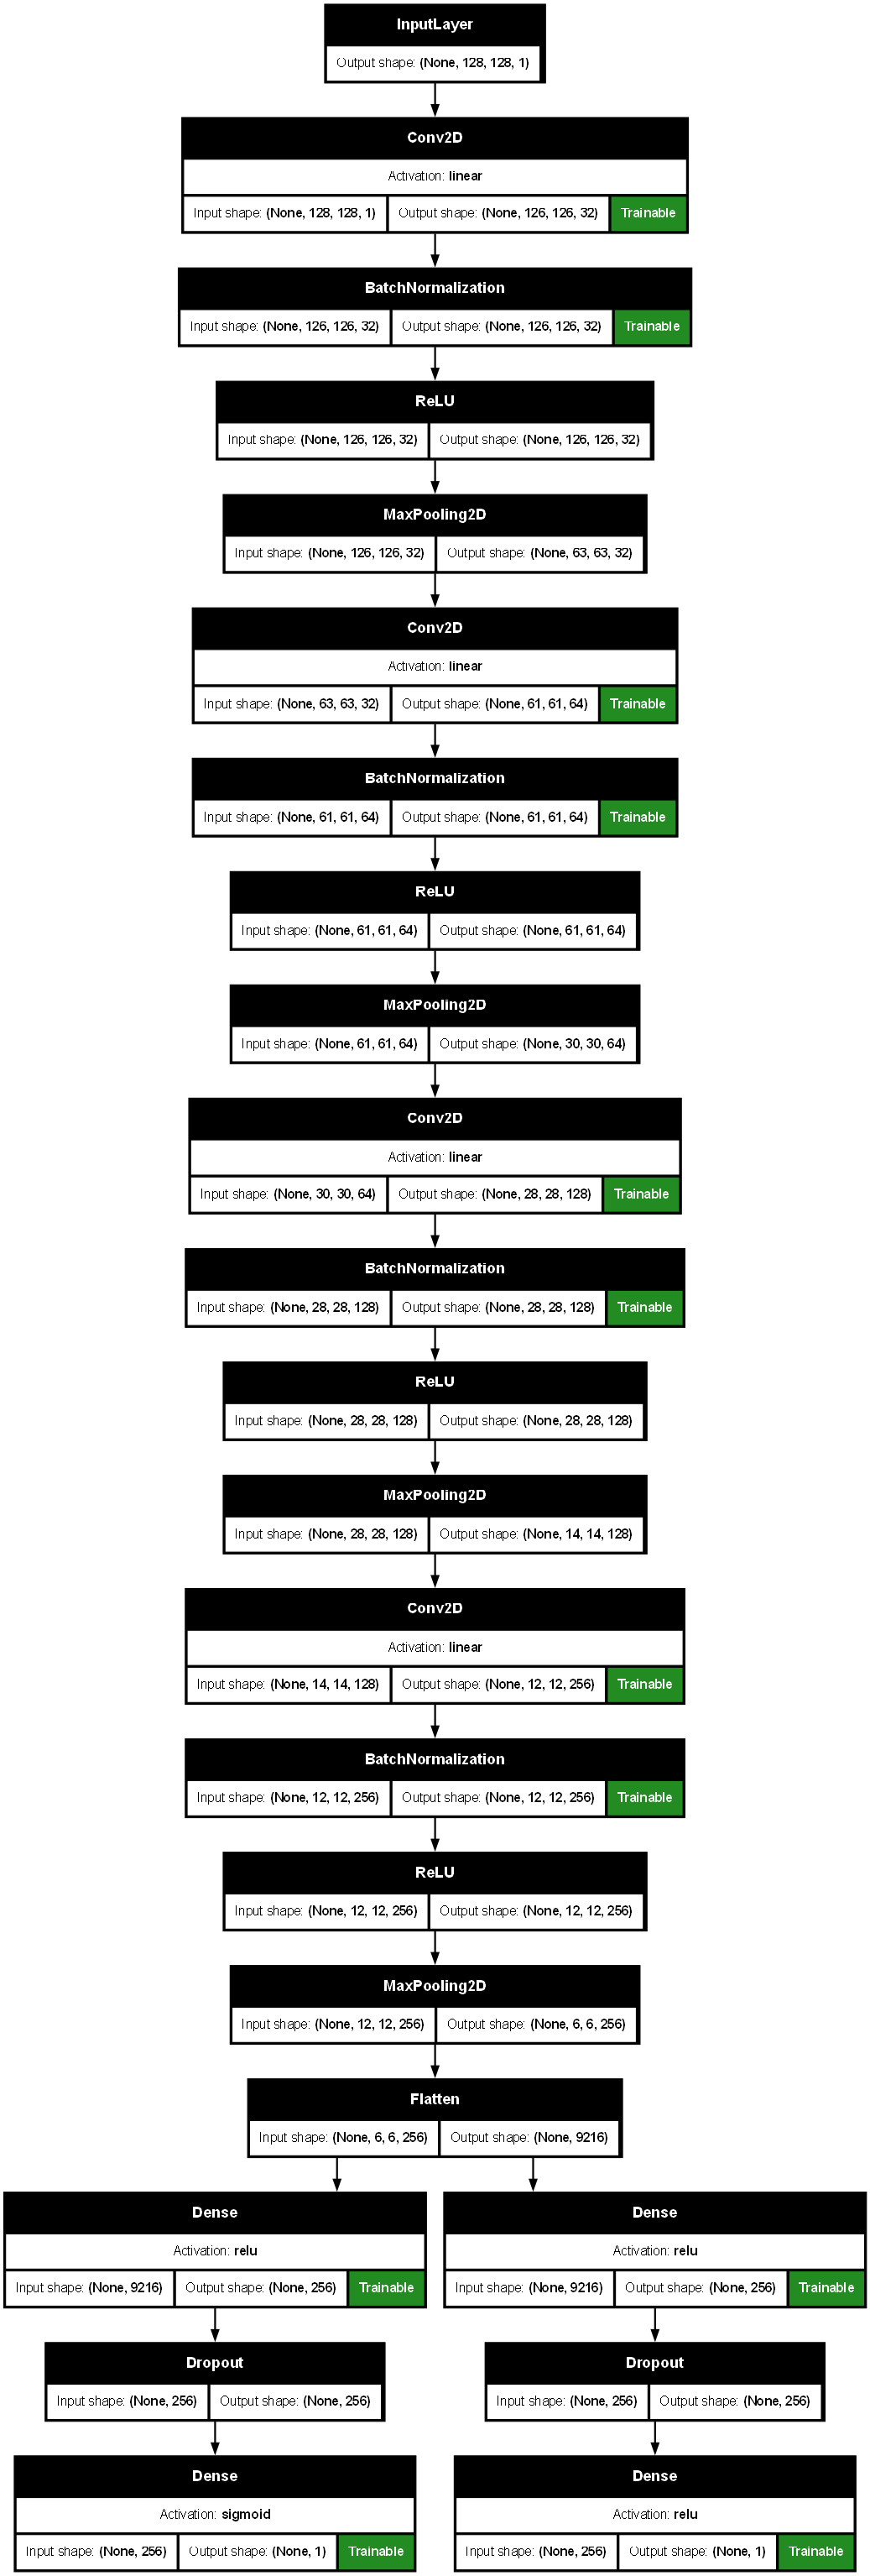

In [23]:
plot_model(
    model,
    show_shapes=True,
    dpi = 80,
    show_layer_activations=True,
    show_trainable=True
)

In [24]:
history = model.fit(x =X,y=[y_gender, y_age],batch_size=32,validation_split=0.2,epochs=10)

Epoch 1/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 156s 253ms/step - Age_Output_loss: 8.7919 - Age_Output_mae: 8.7916 - Gender_Output_accuracy: 0.7581 - Gender_Output_loss: 0.5626 - loss: 9.3542 - val_Age_Output_loss: 27.1257 - val_Age_Output_mae: 27.2344 - val_Gender_Output_accuracy: 0.6807 - val_Gender_Output_loss: 0.7420 - val_loss: 27.9783
Epoch 2/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 150s 252ms/step - Age_Output_loss: 7.4335 - Age_Output_mae: 7.4348 - Gender_Output_accuracy: 0.8224 - Gender_Output_loss: 0.3780 - loss: 7.8129 - val_Age_Output_loss: 30.1342 - val_Age_Output_mae: 30.2683 - val_Gender_Output_accuracy: 0.7370 - val_Gender_Output_loss: 0.5479 - val_loss: 30.8156
Epoch 3/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 150s 252ms/step - Age_Output_loss: 6.8974 - Age_Output_mae: 6.8972 - Gender_Output_accuracy: 0.8535 - Gender_Output_loss: 0.3263 - loss: 7.2236 - val_Age_Output_loss: 23.5846 - val_Age_Output_mae: 23.6807 - val_Gender_Output_accuracy: 0.7269 - val_Gender_Output_loss: 0.6019 - val_loss: 24.

In [28]:
X.shape

(23708, 128, 128, 1)

In [29]:
y_gender.shape

(23708,)

In [30]:
print("X.shape---->",X.shape)
print("y_gender.shape---->",y_gender.shape)
print("y_age.shape---->",y_age.shape)

X.shape----> (23708, 128, 128, 1)
y_gender.shape----> (23708,)
y_age.shape----> (23708,)


## Testing With New Pictures

In [31]:
# def Image_to_array(featureColumn):
#     features = []
#     for images in tqdm(featureColumn):
#         image = load_img(images,color_mode='grayscale')
#         image_resized = image.resize((128,128),Image.LANCZOS)
#         image_resized = np.array(image_resized)
#         features.append(image_resized)

#     features = np.array(features)
#     features = features.reshape(len(features),128,128,1)
#     return features
        
    

In [48]:
from PIL import Image

test_image_path = 'oldman2.jpg'
test_image = load_img(test_image_path,color_mode='grayscale')
test_image_resized = test_image.resize((128,128),Image.LANCZOS)
test_image_resized = np.array(test_image_resized)
test_image_reshaped = test_image_resized.reshape(1,128,128,1)
test_image_normalized = test_image_reshaped/255.0

In [49]:
age_pred

array([[2276.9248]], dtype=float32)

In [51]:
predicted_gender, predicted_age = model.predict(test_image_reshaped)
predicted_age_real = predicted_age / 100  # scale down

print(f"Predicted Gender: {'Male' if predicted_gender < 0.5 else 'Female'}")
print(f"Predicted Age: {predicted_age_real[0][0]:.1f} years")
print(predicted_age)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Gender: Male
Predicted Age: 23.1 years
[[2310.6934]]


In [53]:
history.history.keys()

dict_keys(['Age_Output_loss', 'Age_Output_mae', 'Gender_Output_accuracy', 'Gender_Output_loss', 'loss', 'val_Age_Output_loss', 'val_Age_Output_mae', 'val_Gender_Output_accuracy', 'val_Gender_Output_loss', 'val_loss'])

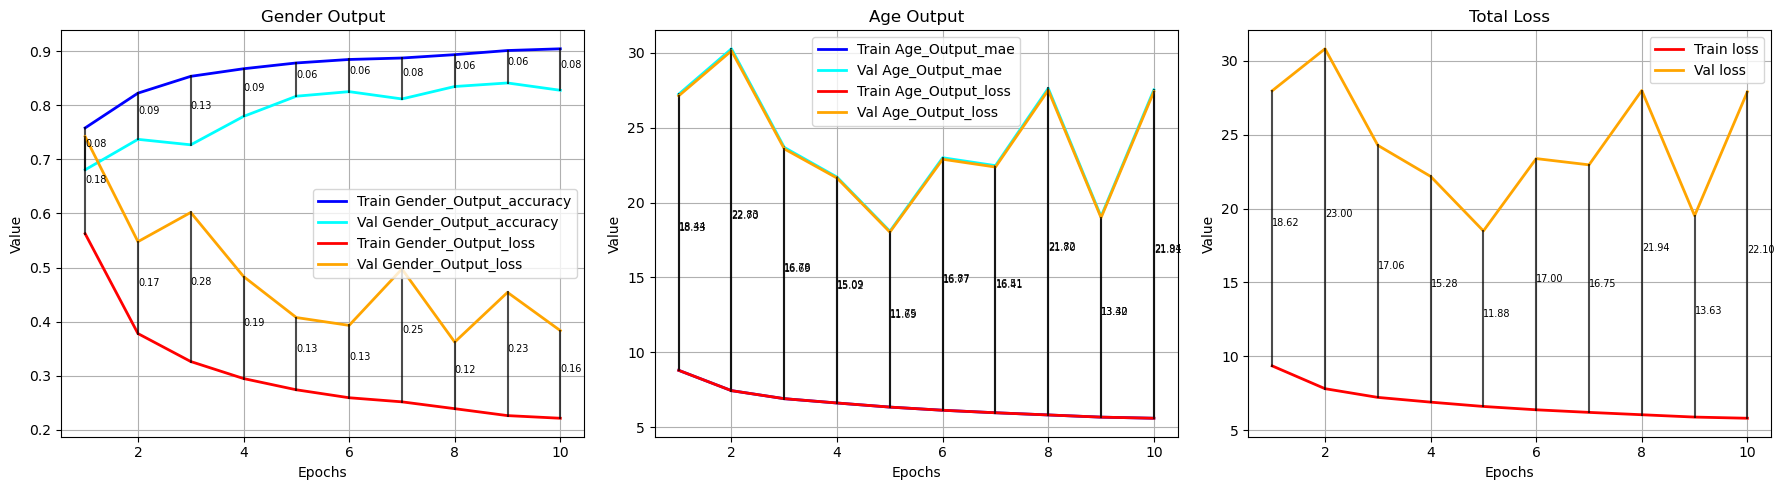

In [67]:
import matplotlib.pyplot as plt
import numpy as np

def plot_history(history):
    keys = history.history.keys()
    epochs = range(1, len(history.history[list(keys)[0]]) + 1)
    
    # Define relationships for subplots
    groups = [
        ('Gender Output', ['Gender_Output_accuracy', 'Gender_Output_loss']),
        ('Age Output', ['Age_Output_mae', 'Age_Output_loss']),
        ('Total Loss', ['loss'])
    ]
    
    n_subplots = len(groups)
    plt.figure(figsize=(6 * n_subplots, 5))
    
    for idx, (title, metrics) in enumerate(groups):
        plt.subplot(1, n_subplots, idx + 1)
        for metric in metrics:
            train = history.history[metric]
            val_key = f'val_{metric}'
            color_train = 'blue' if 'accuracy' in metric or 'mae' in metric else 'red'
            color_val = 'cyan' if 'accuracy' in metric or 'mae' in metric else 'orange'
            
            # Plot train
            plt.plot(epochs, train, label=f'Train {metric}', color=color_train, linewidth=2)
            
            # Plot val if exists
            if val_key in keys:
                val = history.history[val_key]
                plt.plot(epochs, val, label=f'Val {metric}', color=color_val, linewidth=2)
                
                # Difference lines + distance
                for i in range(len(epochs)):
                    y1 = train[i]
                    y2 = val[i]
                    distance = abs(y1 - y2)
                    plt.plot([epochs[i], epochs[i]], [y1, y2], color='black', linewidth=1.5, alpha=0.7)
                    plt.text(epochs[i], (y1 + y2)/2, f"{distance:.2f}", fontsize=7, ha='left', va='bottom')
        
        plt.title(title)
        plt.xlabel('Epochs')
        ylabel = 'Value'
        plt.ylabel(ylabel)
        plt.grid(True)
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_history(history)


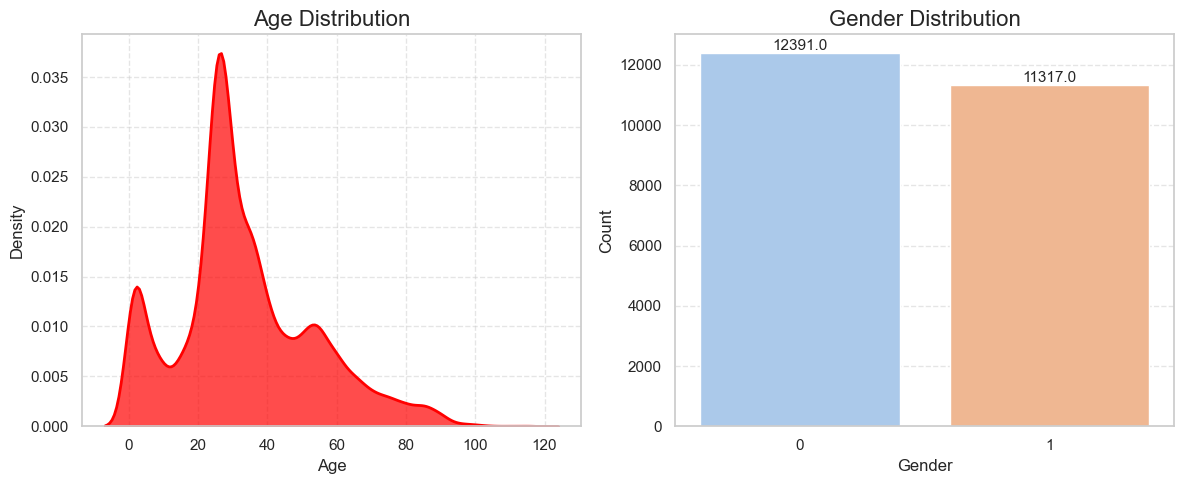

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # clean grid background
plt.figure(figsize=(12,5))

# -------------------------------
# Subplot 1: Age KDE
# -------------------------------
plt.subplot(1,2,1)
sns.kdeplot(data['Age'], shade=True, color="red", linewidth=2, alpha=0.7)
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# -------------------------------
# Subplot 2: Gender Countplot
# -------------------------------
plt.subplot(1,2,2)
ax = sns.countplot(x='Gender', data=data, palette="pastel")  # nicer colors
plt.title("Gender Distribution", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()
